In [43]:
import pandas as pd
import numpy as np
import openpyxl
import os
import glob
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [44]:
def read_excel(file):
    df = pd.read_excel(file)
    return df

dfs = []

# loop through all files in the folder and read them and append them to the list

for file in glob.glob('../../Data/Processed data/*.xlsx'):
    print(file)
    df = read_excel(file)
    dfs.append(df)


../../Data/Processed data\250 shojja.xlsx
../../Data/Processed data\31 shojja.xlsx
../../Data/Processed data\ad-din.xlsx
../../Data/Processed data\aichi.xlsx
../../Data/Processed data\Al manar.xlsx
../../Data/Processed data\Anowar khan.xlsx
../../Data/Processed data\azgol ali.xlsx
../../Data/Processed data\Delta medical.xlsx
../../Data/Processed data\dmd central.xlsx
../../Data/Processed data\h&h.xlsx
../../Data/Processed data\hfrc.xlsx
../../Data/Processed data\ibn sina.xlsx
../../Data/Processed data\islami bank.xlsx
../../Data/Processed data\lstm_dmc.xlsx
../../Data/Processed data\lstm_dmc_weather.xlsx
../../Data/Processed data\Medical college for women.xlsx
../../Data/Processed data\Metropoliton medical.xlsx
../../Data/Processed data\police hospital.xlsx
../../Data/Processed data\popular medical.xlsx
../../Data/Processed data\shomorita.xlsx
../../Data/Processed data\Square.xlsx
../../Data/Processed data\ssmc.xlsx
../../Data/Processed data\united hospital.xlsx
../../Data/Processed da

In [45]:
dfs[1].head()
coordinates = [(23.78023378522258, 90.36734693327269),
               (23.717878894611427, 90.37687614386095),
               (23.74854258987857, 90.4054805619277),
               (23.881790066203926, 90.40410896582604),
               (23.756052674223117, 90.36321845418024),
               (23.74530536688184, 90.38222402534431),
               (23.70789594683928, 90.42361642349367),
               (23.788602125062823, 90.35348610815265),
               (23.743909512744548, 90.38430874415275),
               (23.751892721210428, 90.38546900815183),
               (23.74692774941598, 90.40312845418005),
               (23.752132125860218, 90.41353537340008),
               (23.73972361480249, 90.4206285118513),
               (23.726327283426574, 90.39766652719375),
               (23.858439631417777, 90.40093773883972),
               (23.858439631417777, 90.40089482349694),
               
               ]

,Date,Affected
0,2021/12/15,-
1,2021/12/16,-
2,2021/12/17,-
3,2021/12/18,-
4,2021/12/19,-


In [46]:
def preprocess(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Date'] = df['Date'].values.astype(float)
    #sort by date
    df = df.sort_values(by='Date')
    # for rows where df['Affected'] is null or non-numeric, replace with 0
    df['Affected'] = pd.to_numeric(df['Affected'], errors='coerce').fillna(0).astype(float)
    df.reset_index(drop=True, inplace=True)
    return df

In [47]:
i=1

for df in dfs:
    print(str(i))
    df = preprocess(df)
    print("done ")
    i+=1

1
done 
2
done 
3
done 
4
done 
5
done 
6
done 
7
done 
8
done 
9
done 
10
done 
11
done 
12
done 
13
done 
14
done 
15
done 
16
done 
17
done 
18
done 
19
done 
20
done 
21
done 
22
done 
23
done 
24
done 
25
done 


In [48]:
coordinates = [(23.78023378522258, 90.36734693327269),
               (23.717878894611427, 90.37687614386095)
               ]

In [49]:
# find distance between two coordinates
def distance(lat1, lon1, lat2, lon2):
    R = 6371
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    return d

In [50]:
# find distance between each pair of coordinates from coordinates array and save them in a new array
distances = []
for i in range(len(coordinates)):
    for j in range(i+1, len(coordinates)):
        distances.append(distance(coordinates[i][0], coordinates[i][1], coordinates[j][0], coordinates[j][1]))

In [51]:
# Make a graph of 5 nodes and connect each pair of nodes with an edge. The weight of each edge is the distance between the two nodes
import networkx as nx
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4])
G.add_edge(0, 1, weight=distances[0])
G.add_edge(0, 2, weight=distances[1])
G.add_edge(0, 3, weight=distances[2])
G.add_edge(0, 4, weight=distances[3])
G.add_edge(1, 2, weight=distances[4])
G.add_edge(1, 3, weight=distances[5])
G.add_edge(1, 4, weight=distances[6])
G.add_edge(2, 3, weight=distances[7])
G.add_edge(2, 4, weight=distances[8])
G.add_edge(3, 4, weight=distances[9])


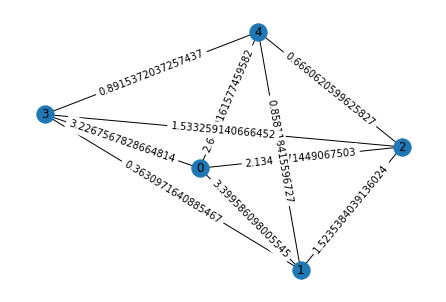

<Figure size 1440x720 with 0 Axes>

In [52]:
# plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.figure(figsize=(20, 10))
plt.show()

In [53]:
# in df_square, add a new 4 columns for distance from each hospital

df_square['Distance from dmc'] = 0
df_square['Distance from popular'] = 0
df_square['Distance from shomorita'] = 0
df_square['Distance from Anowar Khan'] = 0

# df_dmc['Distance from square'] = 0
# df_dmc['Distance from popular'] = 0
# df_dmc['Distance from shomorita'] = 0
# df_dmc['Distance from Anowar Khan'] = 0

# df_dmc['Affected from square'] = 0
# df_dmc['Affected from popular'] = 0
# df_dmc['Affected from shomorita'] = 0
# df_dmc['Affected from Anowar Khan'] = 0

df_square['Affected from dmc'] = 0
df_square['Affected from popular'] = 0
df_square['Affected from shomorita'] = 0
df_square['Affected from Anowar Khan'] = 0

# now populate the columns with distance from each hospital* the Affected value for same date in corresponding hospital
for i in range(len(df_dmc)):
    # df_dmc['Distance from square'][i] = distance(23.726219241260043, 90.39761288327254, 23.753040178769584, 90.38158125443664) 
    # df_dmc['Distance from popular'][i] = distance(23.726219241260043, 90.39761288327254, 23.739355425694136, 90.38232134094551) 
    # df_dmc['Distance from shomorita'][i] = distance(23.726219241260043, 90.39761288327254, 23.752899859215965, 90.38514558141829) 
    # df_dmc['Distance from Anowar Khan'][i] = distance(23.726219241260043, 90.39761288327254, 23.745344649198245, 90.38221329676377) 
    df_square['Distance from dmc'][i] = distance(23.753040178769584, 90.38158125443664, 23.726219241260043, 90.39761288327254)
    df_square['Distance from popular'][i] = distance(23.753040178769584, 90.38158125443664, 23.739355425694136, 90.38232134094551)
    df_square['Distance from shomorita'][i] = distance(23.753040178769584, 90.38158125443664, 23.752899859215965, 90.38514558141829)
    df_square['Distance from Anowar Khan'][i] = distance(23.753040178769584, 90.38158125443664, 23.745344649198245, 90.38221329676377)

for i in range(len(df_dmc)):
    # df_dmc['Affected from square'][i] = df_square['Affected'][i]
    # df_dmc['Affected from popular'][i] = df_popular['Affected'][i]
    # df_dmc['Affected from shomorita'][i] = df_shomorita['Affected'][i]
    # df_dmc['Affected from Anowar Khan'][i] = df_anowarKhan['Affected'][i]
    df_square['Affected from dmc'][i] = df_dmc['Affected'][i]
    df_square['Affected from popular'][i] = df_popular['Affected'][i]
    df_square['Affected from shomorita'][i] = df_shomorita['Affected'][i]
    df_square['Affected from Anowar Khan'][i] = df_anowarKhan['Affected'][i]

NameError: name 'df_square' is not defined

In [ ]:
# delete last four columns from df_dmc
# df_dmc = df_dmc.drop(columns=['Distance from square', 'Distance from popular', 'Distance from shomorita', 'Distance from Anowar Khan'])
df_square.head()

,Date,Affected,Distance from dmc,Distance from popular,Distance from shomorita,Distance from Anowar Khan,Affected from dmc,Affected from popular,Affected from shomorita,Affected from Anowar Khan
0,1.567296e+18,2.0,3.399586,1.523538,0.363097,0.858118,92,3,1,2
1,1.567382e+18,9.0,3.399586,1.523538,0.363097,0.858118,82,3,0,4
2,1.567469e+18,2.0,3.399586,1.523538,0.363097,0.858118,64,4,0,4
3,1.567728e+18,5.0,3.399586,1.523538,0.363097,0.858118,47,1,0,1
4,1.567814e+18,3.0,3.399586,1.523538,0.363097,0.858118,63,4,0,4


In [ ]:
# #normalize the distaances from zero to one where closer distance will have higher value
# df_dmc['Distance from square'] = (df_dmc['Distance from square'] - df_dmc['Distance from square'].min()) / (df_dmc['Distance from square'].max() - df_dmc['Distance from square'].min())
# df_dmc['Distance from popular'] = (df_dmc['Distance from popular'] - df_dmc['Distance from popular'].min()) / (df_dmc['Distance from popular'].max() - df_dmc['Distance from popular'].min())
# df_dmc['Distance from shomorita'] = (df_dmc['Distance from shomorita'] - df_dmc['Distance from shomorita'].min()) / (df_dmc['Distance from shomorita'].max() - df_dmc['Distance from shomorita'].min()) 
# df_dmc['Distance from Anowar Khan'] = (df_dmc['Distance from Anowar Khan'] - df_dmc['Distance from Anowar Khan'].min()) / (df_dmc['Distance from Anowar Khan'].max() - df_dmc['Distance from Anowar Khan'].min())

In [ ]:
# dmc_distance = df_dmc['Distance from dmc'].max()
# popular_distance = df_dmc['Distance from popular'].max()
# shomorita_distance = df_dmc['Distance from shomorita'].max()
# Anowar_Khan_distance = df_dmc['Distance from Anowar Khan'].max()

dmc_distance = df_square['Distance from dmc'].max()
popular_distance = df_square['Distance from popular'].max()
shomorita_distance = df_square['Distance from shomorita'].max()
Anowar_Khan_distance = df_square['Distance from Anowar Khan'].max()

# print(square_distance, popular_distance, shomorita_distance, Anowar_Khan_distance)
print(dmc_distance, popular_distance, shomorita_distance, Anowar_Khan_distance)

# df_dmc['Distance from square'] = square_distance/ (square_distance + popular_distance + shomorita_distance + Anowar_Khan_distance)
# df_dmc['Distance from popular'] = popular_distance/ (square_distance + popular_distance + shomorita_distance + Anowar_Khan_distance)
# df_dmc['Distance from shomorita'] = shomorita_distance/ (square_distance + popular_distance + shomorita_distance + Anowar_Khan_distance)
# df_dmc['Distance from Anowar Khan'] = Anowar_Khan_distance/ (square_distance + popular_distance + shomorita_distance + Anowar_Khan_distance)

df_square['Distance from dmc'] = dmc_distance/ (dmc_distance + popular_distance + shomorita_distance + Anowar_Khan_distance)
df_square['Distance from popular'] = popular_distance/ (dmc_distance + popular_distance + shomorita_distance + Anowar_Khan_distance)
df_square['Distance from shomorita'] = shomorita_distance/ (dmc_distance + popular_distance + shomorita_distance + Anowar_Khan_distance)
df_square['Distance from Anowar Khan'] = Anowar_Khan_distance/ (dmc_distance + popular_distance + shomorita_distance + Anowar_Khan_distance)

3.399586098005545 1.5235384039136024 0.3630971640885467 0.858118415596727


In [ ]:
# df_dmc['Distance from square'] = 1 - df_dmc['Distance from square']
# df_dmc['Distance from popular'] = 1 - df_dmc['Distance from popular']
# df_dmc['Distance from shomorita'] = 1 - df_dmc['Distance from shomorita']
# df_dmc['Distance from Anowar Khan'] = 1 - df_dmc['Distance from Anowar Khan']

df_square['Distance from dmc'] = 1 - df_square['Distance from dmc']
df_square['Distance from popular'] = 1 - df_square['Distance from popular']
df_square['Distance from shomorita'] = 1 - df_square['Distance from shomorita']
df_square['Distance from Anowar Khan'] = 1 - df_square['Distance from Anowar Khan']

# df_dmc.head()
df_square.head()

,Date,Affected,Distance from dmc,Distance from popular,Distance from shomorita,Distance from Anowar Khan,Affected from dmc,Affected from popular,Affected from shomorita,Affected from Anowar Khan
0,1.567296e+18,2.0,0.446713,0.752042,0.940905,0.86034,92,3,1,2
1,1.567382e+18,9.0,0.446713,0.752042,0.940905,0.86034,82,3,0,4
2,1.567469e+18,2.0,0.446713,0.752042,0.940905,0.86034,64,4,0,4
3,1.567728e+18,5.0,0.446713,0.752042,0.940905,0.86034,47,1,0,1
4,1.567814e+18,3.0,0.446713,0.752042,0.940905,0.86034,63,4,0,4


In [ ]:
# square_distance = df_dmc['Distance from square'].max()
# popular_distance = df_dmc['Distance from popular'].max()
# shomorita_distance = df_dmc['Distance from shomorita'].max()
# Anowar_Khan_distance = df_dmc['Distance from Anowar Khan'].max()

dmc_distance = df_square['Distance from dmc'].max()
popular_distance = df_square['Distance from popular'].max()
shomorita_distance = df_square['Distance from shomorita'].max()
Anowar_Khan_distance = df_square['Distance from Anowar Khan'].max()

# df_dmc['Distance from square'] = square_distance/ (square_distance + popular_distance + shomorita_distance + Anowar_Khan_distance)
# df_dmc['Distance from popular'] = popular_distance/ (square_distance + popular_distance + shomorita_distance + Anowar_Khan_distance)
# df_dmc['Distance from shomorita'] = shomorita_distance/ (square_distance + popular_distance + shomorita_distance + Anowar_Khan_distance)
# df_dmc['Distance from Anowar Khan'] = Anowar_Khan_distance/ (square_distance + popular_distance + shomorita_distance + Anowar_Khan_distance)

df_popular['Distance from dmc'] = dmc_distance/ (dmc_distance + popular_distance + shomorita_distance + Anowar_Khan_distance)
df_popular['Distance from popular'] = popular_distance/ (dmc_distance + popular_distance + shomorita_distance + Anowar_Khan_distance)
df_popular['Distance from shomorita'] = shomorita_distance/ (dmc_distance + popular_distance + shomorita_distance + Anowar_Khan_distance)
df_popular['Distance from Anowar Khan'] = Anowar_Khan_distance/ (dmc_distance + popular_distance + shomorita_distance + Anowar_Khan_distance)

# df_dmc.head()
df_square.head()

,Date,Affected,Distance from dmc,Distance from popular,Distance from shomorita,Distance from Anowar Khan,Affected from dmc,Affected from popular,Affected from shomorita,Affected from Anowar Khan
0,1.567296e+18,2.0,0.446713,0.752042,0.940905,0.86034,92,3,1,2
1,1.567382e+18,9.0,0.446713,0.752042,0.940905,0.86034,82,3,0,4
2,1.567469e+18,2.0,0.446713,0.752042,0.940905,0.86034,64,4,0,4
3,1.567728e+18,5.0,0.446713,0.752042,0.940905,0.86034,47,1,0,1
4,1.567814e+18,3.0,0.446713,0.752042,0.940905,0.86034,63,4,0,4


In [ ]:
# df_dmc['Affected from square'] = df_dmc['Affected from square'] * df_dmc['Distance from square']
# df_dmc['Affected from popular'] = df_dmc['Affected from popular'] * df_dmc['Distance from popular']
# df_dmc['Affected from shomorita'] = df_dmc['Affected from shomorita'] * df_dmc['Distance from shomorita']
# df_dmc['Affected from Anowar Khan'] = df_dmc['Affected from Anowar Khan'] * df_dmc['Distance from Anowar Khan']

df_square['Affected from dmc'] = df_square['Affected from dmc'] * df_square['Distance from dmc']
df_square['Affected from popular'] = df_square['Affected from popular'] * df_square['Distance from popular']
df_square['Affected from shomorita'] = df_square['Affected from shomorita'] * df_square['Distance from shomorita']
df_square['Affected from Anowar Khan'] = df_square['Affected from Anowar Khan'] * df_square['Distance from Anowar Khan']

# df_dmc.head()
df_square.head()

,Date,Affected,Distance from dmc,Distance from popular,Distance from shomorita,Distance from Anowar Khan,Affected from dmc,Affected from popular,Affected from shomorita,Affected from Anowar Khan
0,1.567296e+18,2.0,0.446713,0.752042,0.940905,0.86034,41.097557,2.256126,0.940905,1.72068
1,1.567382e+18,9.0,0.446713,0.752042,0.940905,0.86034,36.630431,2.256126,0.000000,3.44136
2,1.567469e+18,2.0,0.446713,0.752042,0.940905,0.86034,28.589605,3.008168,0.000000,3.44136
3,1.567728e+18,5.0,0.446713,0.752042,0.940905,0.86034,20.995491,0.752042,0.000000,0.86034
4,1.567814e+18,3.0,0.446713,0.752042,0.940905,0.86034,28.142892,3.008168,0.000000,3.44136


In [ ]:
# add all the affected values from each hospital and save it in a new column
# df_dmc['Total Affected Nearby'] = df_dmc['Affected from square'] + df_dmc['Affected from popular'] + df_dmc['Affected from shomorita'] + df_dmc['Affected from Anowar Khan']
df_square['Total Affected Nearby'] = df_square['Affected from dmc'] + df_square['Affected from popular'] + df_square['Affected from shomorita'] + df_square['Affected from Anowar Khan']

# df_dmc.head()
df_square.head()

,Date,Affected,Distance from dmc,Distance from popular,Distance from shomorita,Distance from Anowar Khan,Affected from dmc,Affected from popular,Affected from shomorita,Affected from Anowar Khan,Total Affected Nearby
0,1.567296e+18,2.0,0.446713,0.752042,0.940905,0.86034,41.097557,2.256126,0.940905,1.72068,46.015268
1,1.567382e+18,9.0,0.446713,0.752042,0.940905,0.86034,36.630431,2.256126,0.000000,3.44136,42.327917
2,1.567469e+18,2.0,0.446713,0.752042,0.940905,0.86034,28.589605,3.008168,0.000000,3.44136,35.039133
3,1.567728e+18,5.0,0.446713,0.752042,0.940905,0.86034,20.995491,0.752042,0.000000,0.86034,22.607873
4,1.567814e+18,3.0,0.446713,0.752042,0.940905,0.86034,28.142892,3.008168,0.000000,3.44136,34.592420


In [ ]:
# drop all the columns except 'Date'. 'Affected' and 'Total Affected Nearby'

# df_dmc = df_dmc.drop(columns=['Distance from square', 'Distance from popular', 'Distance from shomorita', 'Distance from Anowar Khan', 'Affected from square', 'Affected from popular', 'Affected from shomorita', 'Affected from Anowar Khan'])

df_square = df_square.drop(columns=['Distance from dmc', 'Distance from popular', 'Distance from shomorita', 'Distance from Anowar Khan', 'Affected from dmc', 'Affected from popular', 'Affected from shomorita', 'Affected from Anowar Khan'])

# df_dmc.head()
df_square.head()

,Date,Affected,Total Affected Nearby
0,1.567296e+18,2.0,46.015268
1,1.567382e+18,9.0,42.327917
2,1.567469e+18,2.0,35.039133
3,1.567728e+18,5.0,22.607873
4,1.567814e+18,3.0,34.592420


In [ ]:
# defining hyperparameters
num_epochs = 500
learning_rate = 0.001
batch_size = 32
input_size = 14
prediction_window = 3
window_size = input_size + prediction_window
hidden_size = 64
num_layers = 1


print("num_epochs: ", num_epochs, " learning_rate: ", learning_rate, " batch_size: ", batch_size, " window_size: ", window_size, " input_size: ", input_size, " num_layers: ", num_layers)

num_epochs:  500  learning_rate:  0.001  batch_size:  32  window_size:  17  input_size:  14  num_layers:  1


In [ ]:
def create_time_series_samples(df, window_size):
    samples = []

    for i in range(len(df) - window_size + 1):
        sample = df.iloc[i:i + window_size]
        samples.append(sample)

    return samples

samples = create_time_series_samples(df_square, window_size)

In [ ]:
samples[0]

,Date,Affected,Total Affected Nearby
0,1.567296e+18,2.0,46.015268
1,1.567382e+18,9.0,42.327917
2,1.567469e+18,2.0,35.039133
3,1.567728e+18,5.0,22.607873
4,1.567814e+18,3.0,34.592420
5,1.567901e+18,0.0,29.722189
6,1.568074e+18,3.0,17.105939
7,1.568160e+18,4.0,25.030299
8,1.568246e+18,0.0,40.052227
9,1.568333e+18,0.0,24.253340


In [ ]:
#drop the 'Date' column from each sample
samples = [sample.drop(columns=['Date']) for sample in samples]

samples[0]

,Affected,Total Affected Nearby
0,2.0,46.015268
1,9.0,42.327917
2,2.0,35.039133
3,5.0,22.607873
4,3.0,34.592420
5,0.0,29.722189
6,3.0,17.105939
7,4.0,25.030299
8,0.0,40.052227
9,0.0,24.253340


In [ ]:
#convert two columns to one column by concatenating them one after another for samples[0]
sample = samples[0].values.reshape(-1)
print(sample)

# do the same for all the samples
samples = [sample.values.reshape(-1) for sample in samples]


[ 2.         46.01526836  9.         42.32791722  2.         35.03913284
  5.         22.60787306  3.         34.59242026  0.         29.72218913
  3.         17.10593898  4.         25.03029938  0.         40.05222657
  0.         24.25334019  1.         23.64268138  1.         19.75031388
  1.         17.55265155  1.         16.08165272  1.         18.28213047
  2.         24.41728642  3.         23.35991503]


In [ ]:
# now make each sample a dataframe

samples = [pd.DataFrame(sample) for sample in samples]

samples[0]

,0
0,2.000000
1,46.015268
2,9.000000
3,42.327917
4,2.000000
5,35.039133
6,5.000000
7,22.607873
8,3.000000
9,34.592420


In [ ]:
# make a dataframe of all the samples
samples = pd.concat(samples, axis=1).T

samples.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,2.0,46.015268,9.0,42.327917,2.0,35.039133,5.0,22.607873,3.0,34.592420,...,1.0,17.552652,1.0,16.081653,1.0,18.282130,2.0,24.417286,3.0,23.359915
0,9.0,42.327917,2.0,35.039133,5.0,22.607873,3.0,34.592420,0.0,29.722189,...,1.0,16.081653,1.0,18.282130,2.0,24.417286,3.0,23.359915,0.0,16.495280
0,2.0,35.039133,5.0,22.607873,3.0,34.592420,0.0,29.722189,3.0,17.105939,...,1.0,18.282130,2.0,24.417286,3.0,23.359915,0.0,16.495280,2.0,18.728843
0,5.0,22.607873,3.0,34.592420,0.0,29.722189,3.0,17.105939,4.0,25.030299,...,2.0,24.417286,3.0,23.359915,0.0,16.495280,2.0,18.728843,0.0,17.891066
0,3.0,34.592420,0.0,29.722189,3.0,17.105939,4.0,25.030299,0.0,40.052227,...,3.0,23.359915,0.0,16.495280,2.0,18.728843,0.0,17.891066,1.0,8.487539


In [ ]:
# if any cell is null, replace it with 0
samples = samples.fillna(0)

In [ ]:
samples.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,2.0,46.015268,9.0,42.327917,2.0,35.039133,5.0,22.607873,3.0,34.592420,...,1.0,17.552652,1.0,16.081653,1.0,18.282130,2.0,24.417286,3.0,23.359915
0,9.0,42.327917,2.0,35.039133,5.0,22.607873,3.0,34.592420,0.0,29.722189,...,1.0,16.081653,1.0,18.282130,2.0,24.417286,3.0,23.359915,0.0,16.495280
0,2.0,35.039133,5.0,22.607873,3.0,34.592420,0.0,29.722189,3.0,17.105939,...,1.0,18.282130,2.0,24.417286,3.0,23.359915,0.0,16.495280,2.0,18.728843
0,5.0,22.607873,3.0,34.592420,0.0,29.722189,3.0,17.105939,4.0,25.030299,...,2.0,24.417286,3.0,23.359915,0.0,16.495280,2.0,18.728843,0.0,17.891066
0,3.0,34.592420,0.0,29.722189,3.0,17.105939,4.0,25.030299,0.0,40.052227,...,3.0,23.359915,0.0,16.495280,2.0,18.728843,0.0,17.891066,1.0,8.487539


In [ ]:
# delete every 2nd row from samples i.e 2nd row, 4th row, 6th row, 8th row, etc
samples = samples.iloc[::2]

samples.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,2.0,46.015268,9.0,42.327917,2.0,35.039133,5.0,22.607873,3.0,34.592420,...,1.0,17.552652,1.0,16.081653,1.0,18.282130,2.0,24.417286,3.0,23.359915
0,2.0,35.039133,5.0,22.607873,3.0,34.592420,0.0,29.722189,3.0,17.105939,...,1.0,18.282130,2.0,24.417286,3.0,23.359915,0.0,16.495280,2.0,18.728843
0,3.0,34.592420,0.0,29.722189,3.0,17.105939,4.0,25.030299,0.0,40.052227,...,3.0,23.359915,0.0,16.495280,2.0,18.728843,0.0,17.891066,1.0,8.487539
0,3.0,17.105939,4.0,25.030299,0.0,40.052227,0.0,24.253340,1.0,23.642681,...,2.0,18.728843,0.0,17.891066,1.0,8.487539,1.0,16.081653,0.0,16.528365
0,0.0,40.052227,0.0,24.253340,1.0,23.642681,1.0,19.750314,1.0,17.552652,...,1.0,8.487539,1.0,16.081653,0.0,16.528365,1.0,18.032449,0.0,14.153419


In [ ]:
input_size = input_size * 2
prediction_window = prediction_window * 2
window_size = input_size + prediction_window

In [ ]:
def train_test_split(df, split_ratio, shuffle):
    if shuffle:
        df = df.sample(frac=1)

    split_index = int(len(df) * split_ratio)
    train = df[:split_index]
    test = df[split_index:]

    return train, test

train_df , test_df = train_test_split(samples, 0.8, True)

In [ ]:
def split_X_y(df):
    #last prediction_window columns are y
    y = df.iloc[:, -prediction_window:]
    #first window_size - prediction_window columns are X
    X = df.iloc[:, :input_size]
    return X, y

X_train, y_train = split_X_y(train_df)
X_test, y_test = split_X_y(test_df)

In [ ]:
print("X_train.shape: ", X_train.shape, " y_train.shape: ", y_train.shape, " X_test.shape: ", X_test.shape, " y_test.shape: ", y_test.shape)

X_train.shape:  (272, 28)  y_train.shape:  (272, 6)  X_test.shape:  (69, 28)  y_test.shape:  (69, 6)


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)

X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, prediction_window)  

    def forward(self, x):
        h_t, _ = self.lstm(x)
        output = self.fc(h_t[:, -1, :]) 
        return output

In [ ]:
model = LSTMModel(input_size, hidden_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
train_losses = np.zeros(num_epochs)

for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        inputs = inputs.unsqueeze(1)
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
    train_losses[epoch] = loss.item()

Epoch [1/500], Loss: 120.3628
Epoch [2/500], Loss: 133.0593
Epoch [3/500], Loss: 307.5057
Epoch [4/500], Loss: 88.2229
Epoch [5/500], Loss: 441.8134
Epoch [6/500], Loss: 266.3171
Epoch [7/500], Loss: 258.5623
Epoch [8/500], Loss: 158.6387
Epoch [9/500], Loss: 200.5321
Epoch [10/500], Loss: 53.4189
Epoch [11/500], Loss: 363.4183
Epoch [12/500], Loss: 238.8284
Epoch [13/500], Loss: 89.7354
Epoch [14/500], Loss: 127.4906
Epoch [15/500], Loss: 272.5614
Epoch [16/500], Loss: 66.7132
Epoch [17/500], Loss: 203.5634
Epoch [18/500], Loss: 140.9006
Epoch [19/500], Loss: 115.3868
Epoch [20/500], Loss: 91.5862
Epoch [21/500], Loss: 216.5634
Epoch [22/500], Loss: 133.6295
Epoch [23/500], Loss: 70.5458
Epoch [24/500], Loss: 48.0079
Epoch [25/500], Loss: 239.3977
Epoch [26/500], Loss: 176.8341
Epoch [27/500], Loss: 161.4581
Epoch [28/500], Loss: 81.6210
Epoch [29/500], Loss: 50.1751
Epoch [30/500], Loss: 53.0008
Epoch [31/500], Loss: 128.0185
Epoch [32/500], Loss: 45.1503
Epoch [33/500], Loss: 61.589

In [ ]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor.unsqueeze(1))
    test_loss = criterion(test_outputs.squeeze(), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

predictions = test_outputs.numpy()

Test Loss: 75.6829


In [ ]:
#get the first column of the test set
y_test_1 = y_test[:, 0]
y_test_2 = y_test[:, 1]
# y_test_3 = y_test[:, 2]

# #get the first column of the predictions
predictions_1 = predictions[:, 0]
predictions_2 = predictions[:, 1]
# predictions_3 = predictions[:, 2]

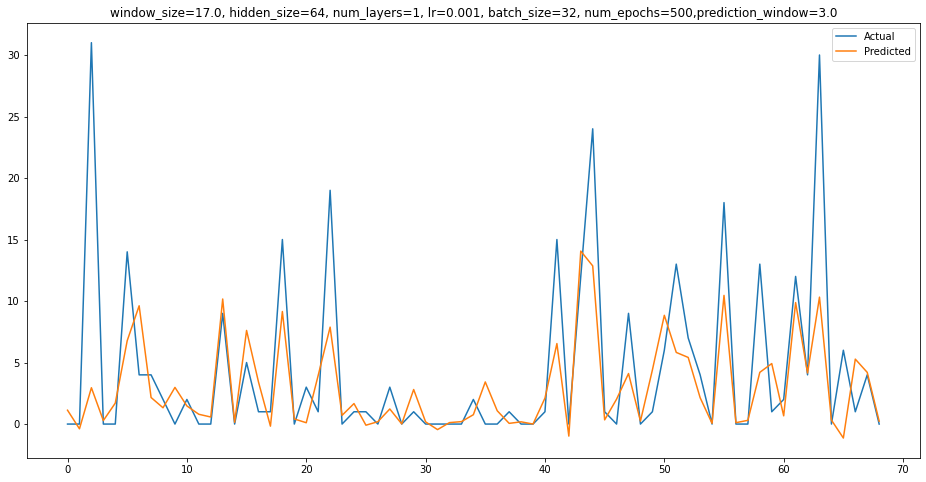

In [ ]:
plt.figure(figsize=(16,8))
plt.title(f'window_size={window_size/2}, hidden_size={hidden_size}, num_layers={num_layers}, lr={learning_rate}, batch_size={batch_size}, num_epochs={num_epochs},prediction_window={prediction_window/2}')
plt.plot(y_test_1, label='Actual')
plt.plot(predictions_1, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# test loss on MAE, MSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Absolute Error: ", mean_absolute_error(y_test_1, predictions_1))
print("Mean Squared Error: ", mean_squared_error(y_test_1, predictions_1))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test_1, predictions_1)))

Mean Absolute Error:  2.9159412651822185
Mean Squared Error:  29.334274298271126
Root Mean Squared Error:  5.4161124709768655


In [ ]:
#save the error values in an excel file where each row will contain the hospital name and the error values
error_df = pd.DataFrame(columns=['Hospital', 'MAE', 'MSE', 'RMSE'])
error_df = error_df.append({'Hospital': 'Square', 'MAE': mean_absolute_error(y_test_1, predictions_1), 'MSE': mean_squared_error(y_test_1, predictions_1), 'RMSE': np.sqrt(mean_squared_error(y_test_1, predictions_1))}, ignore_index=True)
